<a href="https://colab.research.google.com/github/DiborahKiptoon/Feature_selection_techniques/blob/main/Feature_Engineering_Process_and_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Selection**



### **Univariate Feature Selection - chi-squared**


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
# Loading dataset
BC_data = load_breast_cancer()
X, y = BC_data.data, BC_data.target


In [ ]:
%load_ext google.colab.data_table
from IPython.display import HTML, display

feature_names = BC_data.feature_names

# Create a DataFrame to display dataset summary
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Display the first few rows of the dataset as a table
display(df)


The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
# Print the names of variables (features)
print("Variable Names (Features):")
for name in feature_names:
    print(name)

# Print the name of the target variable
print("\nTarget Variable:")
print("target")

Variable Names (Features):
mean radius
mean texture
mean perimeter
mean area
mean smoothness
mean compactness
mean concavity
mean concave points
mean symmetry
mean fractal dimension
radius error
texture error
perimeter error
area error
smoothness error
compactness error
concavity error
concave points error
symmetry error
fractal dimension error
worst radius
worst texture
worst perimeter
worst area
worst smoothness
worst compactness
worst concavity
worst concave points
worst symmetry
worst fractal dimension

Target Variable:
target


In [ ]:
k_best_features = 10
selector = SelectKBest(score_func=chi2, k=k_best_features)
X_new = selector.fit_transform(X, y)

In [ ]:
# Selected feature indices
selected_indices = selector.get_support(indices=True)

In [ ]:
selected_feature_names = BC_data.feature_names[selected_indices]
print("Selected Features:")
print(selected_feature_names)

Selected Features:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'perimeter error' 'area error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area']


In [ ]:
#Calculating the number of reduced features
total_features = X.shape[1]
selected_features = X_new.shape[1]
print("Total number of features in the original dataset:", total_features)
print("Total number of selected features after Univariate Feature Selection:", selected_features)


Total number of features in the original dataset: 30
Total number of selected features after Univariate Feature Selection: 10


### **Feature Selection using ANOVA**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif


In [ ]:
# Load the Breast Cancer dataset from scikit-learn
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names


In [ ]:
# Perform univariate feature selection with ANOVA (SelectKBest)
num_features_to_select = 10
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_new = selector.fit_transform(X, y)


In [ ]:
# selected feature indices and feature names
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = feature_names[selected_feature_indices]



In [ ]:
# Print the selected feature indices and names
print("Selected Feature Indices using Univariate ANOVA:")
print(selected_feature_indices)
print("\nSelected Feature Names using Univariate ANOVA:")
print(selected_feature_names)


Selected Feature Indices using Univariate ANOVA:
[ 0  2  3  6  7 20 22 23 26 27]

Selected Feature Names using Univariate ANOVA:
['mean radius' 'mean perimeter' 'mean area' 'mean concavity'
 'mean concave points' 'worst radius' 'worst perimeter' 'worst area'
 'worst concavity' 'worst concave points']


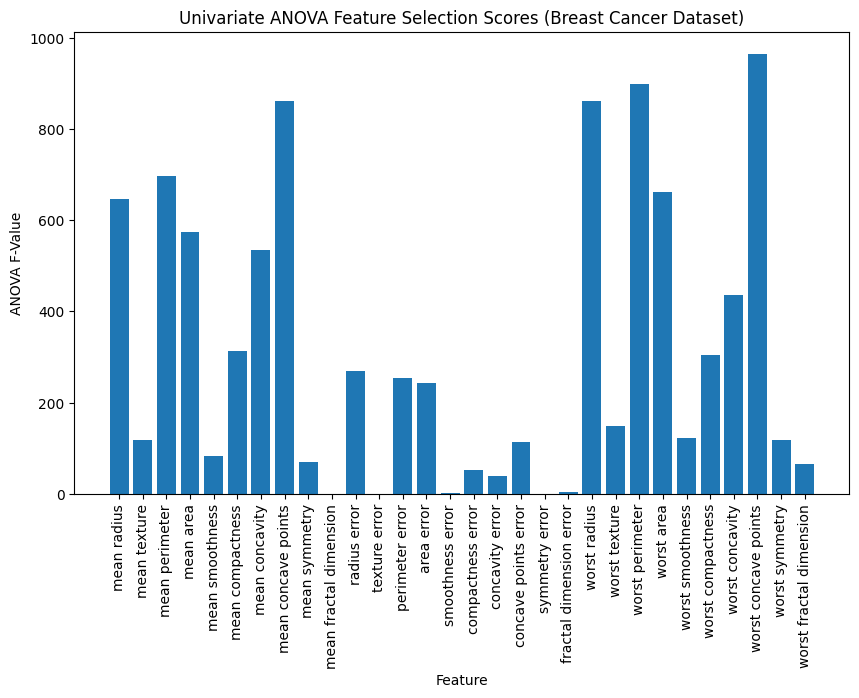

In [ ]:

# Finally, Visualize the feature scores from ANOVA
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), selector.scores_, tick_label=feature_names)
plt.xlabel('Feature')
plt.ylabel('ANOVA F-Value')
plt.title('Univariate ANOVA Feature Selection Scores (Breast Cancer Dataset)')
plt.xticks(rotation=90)
plt.show()

# **Recursive Feature Elimination (RFE)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
# Load dataset
BC_data = load_breast_cancer()
X, y = data.data, data.target


In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create a logistic regression model
model = LogisticRegression(solver='liblinear', multi_class='ovr')


In [ ]:
# Initialize the RFE with the logistic regression model and the total number of features
total_features = X_train.shape[1]
rfe = RFE(model, n_features_to_select=total_features)


In [ ]:
# Fit the RFE to the training data
rfe.fit(X_train, y_train)



RFE(estimator=LogisticRegression(multi_class='ovr', solver='liblinear'),
    n_features_to_select=30)

In [ ]:
# Get the ranking of features based on their importance (1 = most important)
ranking = rfe.ranking_



In [ ]:
# Get the number of irrelevant features to eliminate in each iteration
num_irrelevant_features_eliminated = np.arange(total_features - 1, -1, -1)


In [ ]:
# Visualize the performance as features are eliminated
accuracy_list = []
for i in num_irrelevant_features_eliminated:
    rfe = RFE(model, n_features_to_select=(total_features - i))
    rfe.fit(X_train, y_train)
    y_pred = rfe.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)


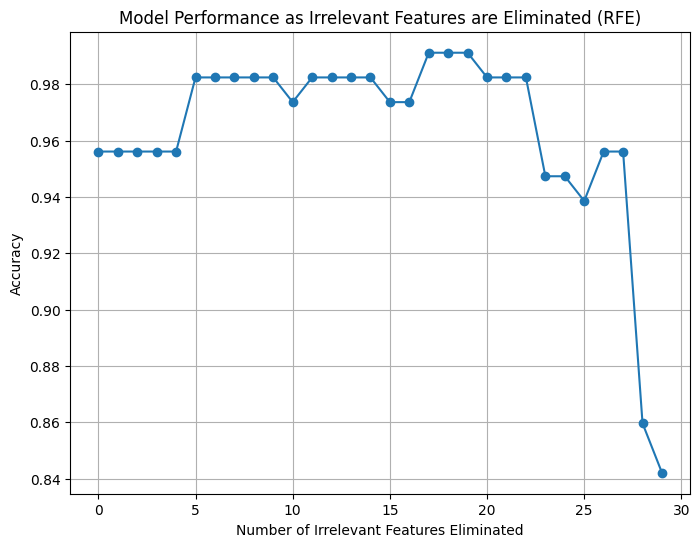

In [ ]:
# Plot the accuracy vs. number of irrelevant features eliminated
plt.figure(figsize=(8, 6))
plt.plot(num_irrelevant_features_eliminated, accuracy_list, marker='o')
plt.xlabel("Number of Irrelevant Features Eliminated")
plt.ylabel("Accuracy")
plt.title("Model Performance as Irrelevant Features are Eliminated (RFE)")
plt.grid(True)
plt.show()

## **Variable Importance Feature Selection (From Tree-Based Models)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Load the Breast Cancer dataset from scikit-learn
BC_data = load_breast_cancer()
X, y = data.data, data.target
feature_names = BC_data.feature_names


In [ ]:
# Create a DataFrame for the dataset
df = pd.DataFrame(X, columns=feature_names)


In [ ]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
# Fit the classifier to the data
rf_classifier.fit(X, y)


RandomForestClassifier(random_state=42)

In [ ]:
# Get feature importances from the random forest
feature_importance = rf_classifier.feature_importances_


In [ ]:
# Sort features by importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]


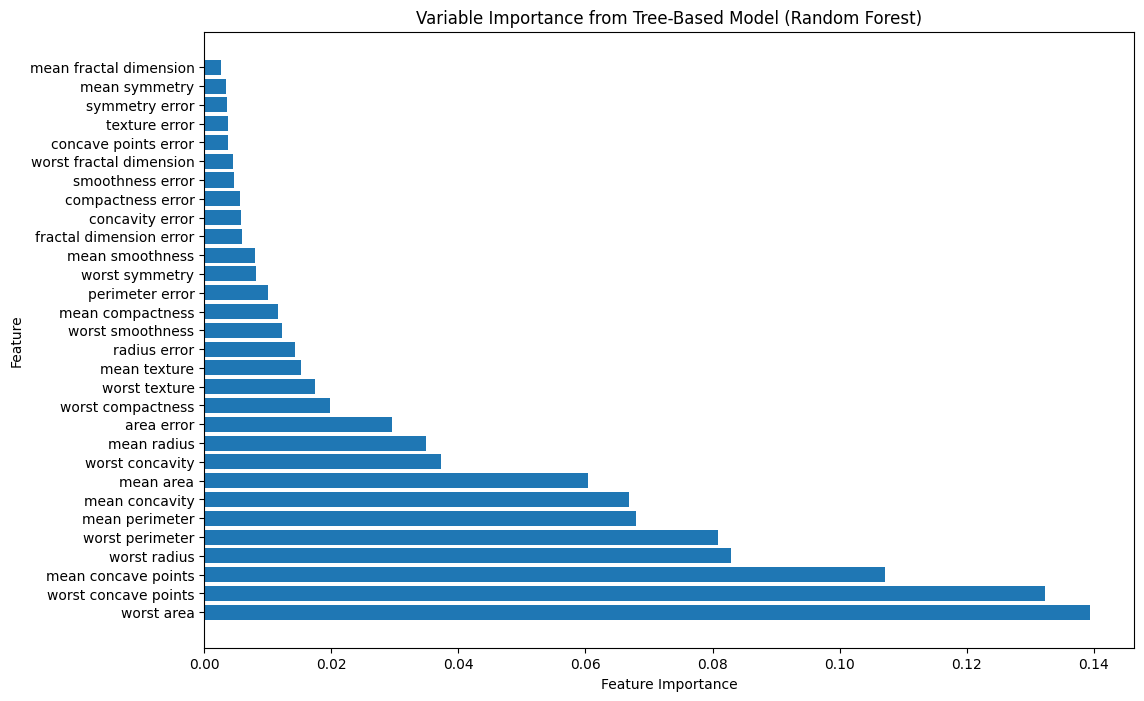

In [ ]:
# Visualize feature importances
plt.figure(figsize=(12, 8))
plt.barh(range(len(feature_names)), sorted_importance, tick_label=sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Variable Importance from Tree-Based Model (Random Forest)')
plt.show()

## **Correlation-based Feature Selection**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer


In [ ]:
# Load the breast cancer dataset
BC_data = load_breast_cancer()
X = pd.DataFrame(BC_data.data, columns=BC_data.feature_names)
y = BC_data.target


In [ ]:
# Calculate the correlation between each feature and the target variable
correlation_values = X.apply(lambda feature: np.abs(np.corrcoef(feature, y)[0, 1]))


In [ ]:
# Sort features based on their correlation values in descending order
sorted_features = correlation_values.sort_values(ascending=False)


In [ ]:
# Select the top-k features with the highest correlation (top 10 in this case)
k = 10
selected_features = sorted_features.index[:k]


In [ ]:
# Set the color palette for both visualizations
color_palette = 'crest'


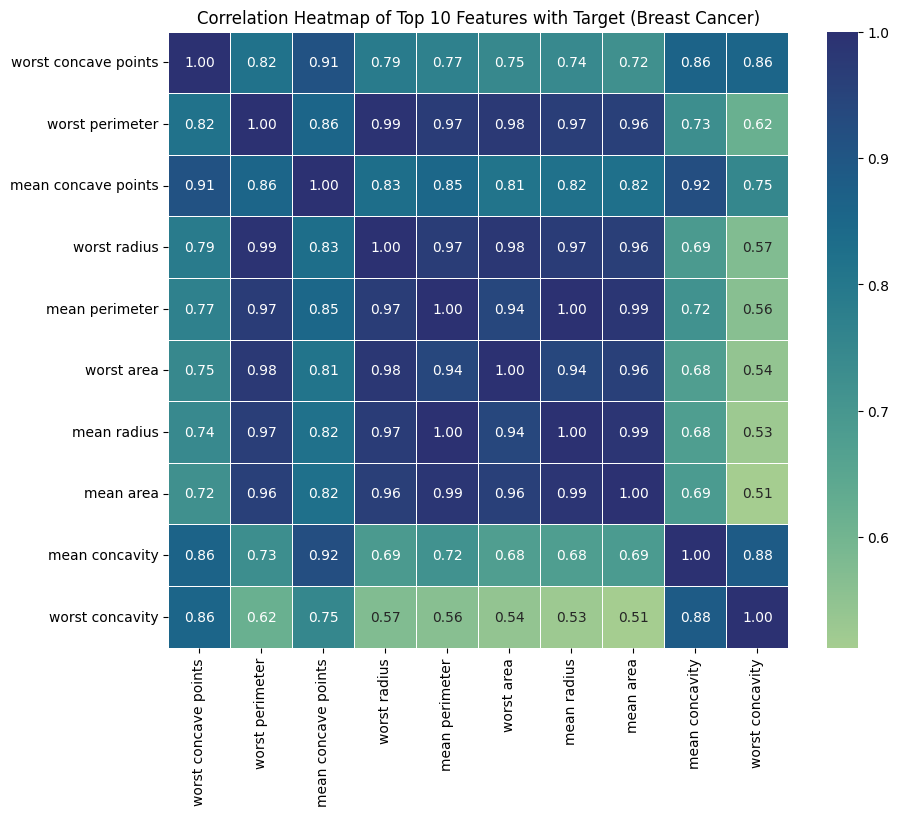

In [ ]:
# Visualization 1: Heatmap of the correlation matrix with top 10 features
plt.figure(figsize=(10, 8))
sns.heatmap(X[selected_features].corr(), annot=True, cmap=color_palette, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Top 10 Features with Target (Breast Cancer)')
plt.show()


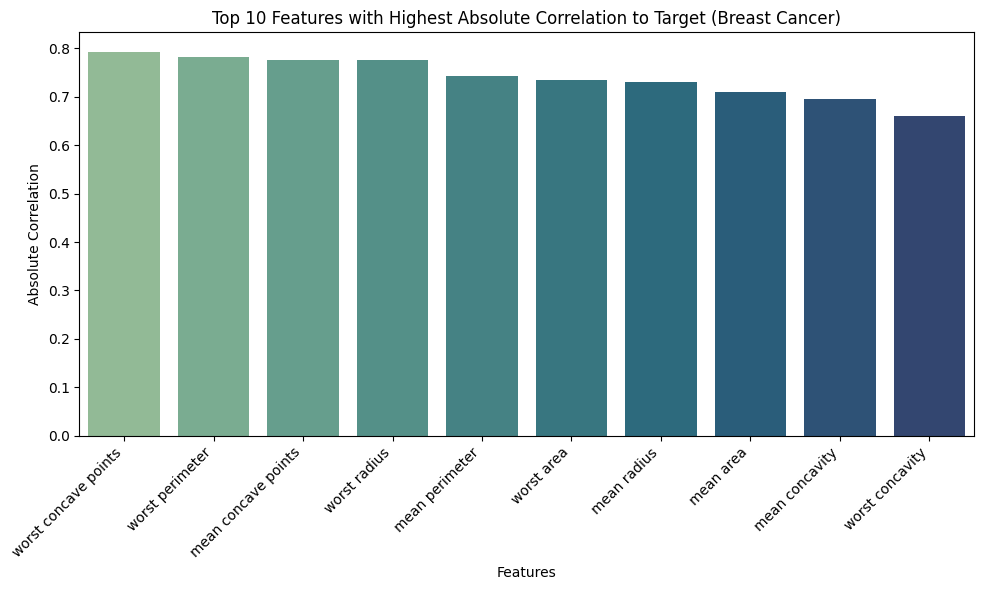

In [ ]:
# Visualization 2: Bar plot of feature correlations with top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x=selected_features, y=sorted_features[:k], palette=color_palette)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.title('Top 10 Features with Highest Absolute Correlation to Target (Breast Cancer)')
plt.tight_layout()
plt.show()

## **Variance Thresholding**

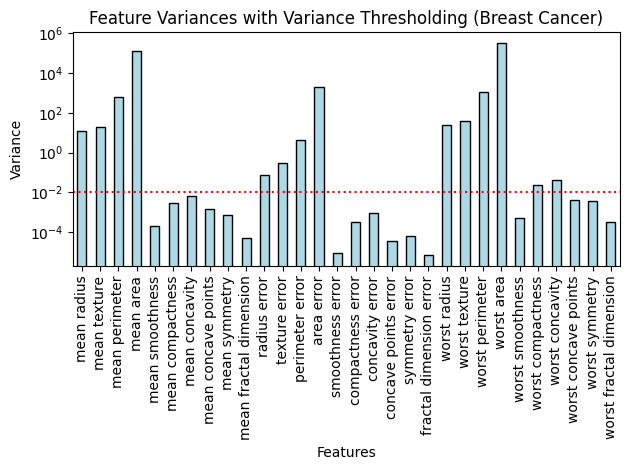

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import VarianceThreshold

# Load the breast cancer dataset
BC_data = load_breast_cancer()
X = pd.DataFrame(BC_data.data, columns=BC_data.feature_names)
y = BC_data.target

# Calculate the variance of each feature
variances = X.var()

# Set a threshold for variance (you can adjust this value)
threshold = 0.01

# Perform Variance Thresholding
selector = VarianceThreshold(threshold=threshold)
X_selected = selector.fit_transform(X)

# Get the names of selected features
selected_features = X.columns[selector.get_support()]

# Visualization: Bar plot of feature variances with variance threshold
ax = pd.Series(variances, index=X.columns).plot(kind='bar', logy=True, color='lightblue', edgecolor='black')
ax.axhline(threshold, ls='dotted', c='red')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('Feature Variances with Variance Thresholding (Breast Cancer)')
plt.tight_layout()
plt.show()


